In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

86.30277962236289 170.67198547610542
-64.975322017919 72.82046406625005
-59.21842095065094 37.765588369125055
-71.42877795414113 -64.94493420763762
21.10580223882768 48.78316884230475
84.35212601655172 -121.2465165168721
-57.43366502759287 -48.666563475919276
11.98104409202162 164.37638891294944
66.65321928936973 -18.86421129958012
-86.26228501605115 -167.47433588778824
12.116510058668865 -170.28278219780586
-34.09421174946666 -127.29289838748339
68.6874208553887 89.08358057668391
77.14434458690357 114.81963232317707
83.50519842566405 87.7774186973719
-7.638510865630451 -38.54026476159973
-80.02519592498668 29.435832776111226
-48.96342446093576 18.674219404629298
-85.41880561730669 141.33472194151852
-42.35558302315231 -54.01871450115301
-52.993681859929524 -113.4972647758622
11.100297653330855 -149.18244427191897
-78.83957610846726 8.895743446484857
-3.907511740684086 -65.31388065704267
-65.60881270602019 -57.17742564253426
83.3790262718569 -175.6601591399417
84.15528986193127 -10.616

-64.56814828146756 46.40926002852734
19.483517030964066 83.6624032573688
84.28062990818171 91.59220738323336
-22.253503849069105 9.134374535004525
-83.76150956831897 26.700720119695006
10.02087485292688 96.20445813752934
32.368179255933455 139.6922521508663
22.245742060709034 -24.662977137850135
89.81395916434062 -176.54584404312433
40.6134556663219 44.03589625347408
-79.23416313355293 -138.34547730127878
-55.7669895815877 -82.22306188125134
-66.58043440341041 104.67441847177906
40.95047086729201 0.47181635823125134
-7.782200091731951 87.33724765021134
14.069976815979828 143.27298375231402
-26.11585061327702 -137.86614883456332
-9.294526340106117 -143.23412282787993
64.42838958854193 -166.4719876011105
-23.156602376259514 64.9155018309257
78.52913894241468 164.71644298716433
61.695781978902176 -90.74142003559429
-3.23591529991063 123.98700569985158
55.27738012081235 169.74892719446962
-66.39716453575383 -23.75836084464501
81.6615710178578 -13.295917635675721
-34.66228985767182 -107.414

In [30]:
from citipy import citipy

In [31]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | riyadh
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | dalvik
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | sao jose do belmonte
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | tefe
Processing Record 23 of Set 1 | mys

Processing Record 37 of Set 4 | chapais
Processing Record 38 of Set 4 | horki
Processing Record 39 of Set 4 | banda aceh
Processing Record 40 of Set 4 | nome
Processing Record 41 of Set 4 | log
Processing Record 42 of Set 4 | murray bridge
Processing Record 43 of Set 4 | baiao
Processing Record 44 of Set 4 | millinocket
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | prachuap khiri khan
Processing Record 50 of Set 4 | dubna
Processing Record 1 of Set 5 | quang ngai
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | waipawa
Processing Record 4 of Set 5 | christchurch
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | wuzhou
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Set 5 | goderich
Processing Record 9 of Set 5 | mwense
Processing Record 10 of Set 5 | san francisco
Processing Record 11 

Processing Record 30 of Set 8 | valley
Processing Record 31 of Set 8 | arraial do cabo
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | saint-louis
Processing Record 34 of Set 8 | pryluky
Processing Record 35 of Set 8 | tahoua
Processing Record 36 of Set 8 | sydney
Processing Record 37 of Set 8 | imbituba
Processing Record 38 of Set 8 | anloga
Processing Record 39 of Set 8 | todos santos
Processing Record 40 of Set 8 | longyearbyen
Processing Record 41 of Set 8 | nishihara
Processing Record 42 of Set 8 | taua
Processing Record 43 of Set 8 | cayenne
Processing Record 44 of Set 8 | bayburt
Processing Record 45 of Set 8 | kloulklubed
Processing Record 46 of Set 8 | sungaipenuh
Processing Record 47 of Set 8 | oktyabrskoye
Processing Record 48 of Set 8 | diffa
Processing Record 49 of Set 8 | borama
City not found. Skipping...
Processing Record 50 of Set 8 | deulgaon raja
Processing Record 1 of Set 9 | benxi
Processing Record 2 of Set 9 | maxixe
Processing Record 3 of Set

Processing Record 17 of Set 12 | saint combs
City not found. Skipping...
Processing Record 18 of Set 12 | angoche
Processing Record 19 of Set 12 | carmen
Processing Record 20 of Set 12 | kuna
Processing Record 21 of Set 12 | boke
Processing Record 22 of Set 12 | nha trang
Processing Record 23 of Set 12 | wentzville
Processing Record 24 of Set 12 | mogadishu
Processing Record 25 of Set 12 | kupino
Processing Record 26 of Set 12 | jining
Processing Record 27 of Set 12 | ermua
Processing Record 28 of Set 12 | sambava
Processing Record 29 of Set 12 | pringsewu
Processing Record 30 of Set 12 | milingimbi
City not found. Skipping...
Processing Record 31 of Set 12 | tezu
Processing Record 32 of Set 12 | tarbes
Processing Record 33 of Set 12 | alakurtti
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,14.36,89,94,9.35,RU,2022-10-14 14:41:26
1,Saint-Philippe,-21.3585,55.7679,72.99,73,34,11.99,RE,2022-10-14 14:41:26
2,Port Alfred,-33.5906,26.8910,68.18,88,99,10.60,ZA,2022-10-14 14:41:27
3,Ushuaia,-54.8000,-68.3000,51.46,58,20,17.27,AR,2022-10-14 14:38:42
4,Riyadh,24.6877,46.7219,91.54,15,0,6.38,SA,2022-10-14 14:41:03
5,Tuktoyaktuk,69.4541,-133.0374,26.60,80,75,18.41,CA,2022-10-14 14:41:27
6,Butaritari,3.0707,172.7902,80.35,79,100,12.12,KI,2022-10-14 14:41:28
7,Dalvik,65.9702,-18.5286,35.53,97,100,18.68,IS,2022-10-14 14:41:28
8,Mataura,-46.1927,168.8643,40.05,98,3,1.79,NZ,2022-10-14 14:41:29
9,Kapaa,22.0752,-159.3190,75.18,94,75,4.61,US,2022-10-14 14:41:29


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-10-14 14:41:26,69.7008,170.3133,14.36,89,94,9.35
1,Saint-Philippe,RE,2022-10-14 14:41:26,-21.3585,55.7679,72.99,73,34,11.99
2,Port Alfred,ZA,2022-10-14 14:41:27,-33.5906,26.8910,68.18,88,99,10.60
3,Ushuaia,AR,2022-10-14 14:38:42,-54.8000,-68.3000,51.46,58,20,17.27
4,Riyadh,SA,2022-10-14 14:41:03,24.6877,46.7219,91.54,15,0,6.38
5,Tuktoyaktuk,CA,2022-10-14 14:41:27,69.4541,-133.0374,26.60,80,75,18.41
6,Butaritari,KI,2022-10-14 14:41:28,3.0707,172.7902,80.35,79,100,12.12
7,Dalvik,IS,2022-10-14 14:41:28,65.9702,-18.5286,35.53,97,100,18.68
8,Mataura,NZ,2022-10-14 14:41:29,-46.1927,168.8643,40.05,98,3,1.79
9,Kapaa,US,2022-10-14 14:41:29,22.0752,-159.3190,75.18,94,75,4.61


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

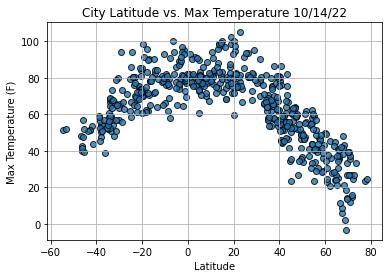

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

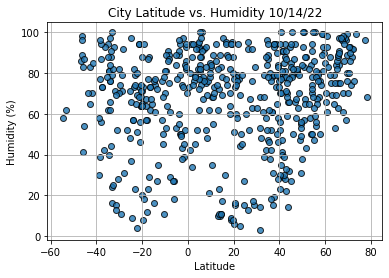

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

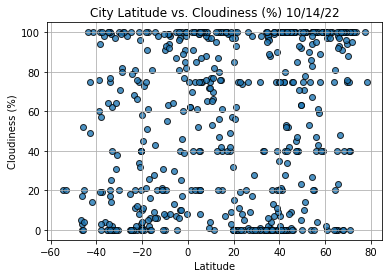

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

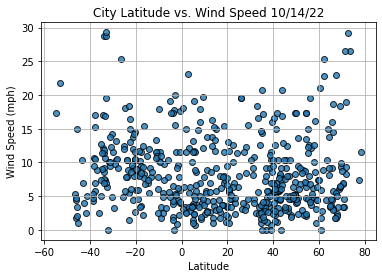

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
531    False
532    False
533     True
534     True
535     True
Name: Lat, Length: 536, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-10-14 14:41:26,69.7008,170.3133,14.36,89,94,9.35
4,Riyadh,SA,2022-10-14 14:41:03,24.6877,46.7219,91.54,15,0,6.38
5,Tuktoyaktuk,CA,2022-10-14 14:41:27,69.4541,-133.0374,26.60,80,75,18.41
6,Butaritari,KI,2022-10-14 14:41:28,3.0707,172.7902,80.35,79,100,12.12
7,Dalvik,IS,2022-10-14 14:41:28,65.9702,-18.5286,35.53,97,100,18.68
...,...,...,...,...,...,...,...,...,...
529,Jining,CN,2022-10-14 14:55:25,35.4050,116.5814,58.69,62,89,4.07
530,Ermua,ES,2022-10-14 14:55:26,43.1833,-2.5000,82.00,59,34,4.54
533,Tezu,IN,2022-10-14 14:55:27,27.9167,96.1667,72.73,92,17,3.02
534,Tarbes,FR,2022-10-14 14:55:27,43.2500,0.1667,70.50,68,100,9.22


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-10-14 14:41:26,69.7008,170.3133,14.36,89,94,9.35
4,Riyadh,SA,2022-10-14 14:41:03,24.6877,46.7219,91.54,15,0,6.38
5,Tuktoyaktuk,CA,2022-10-14 14:41:27,69.4541,-133.0374,26.60,80,75,18.41
6,Butaritari,KI,2022-10-14 14:41:28,3.0707,172.7902,80.35,79,100,12.12
7,Dalvik,IS,2022-10-14 14:41:28,65.9702,-18.5286,35.53,97,100,18.68


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

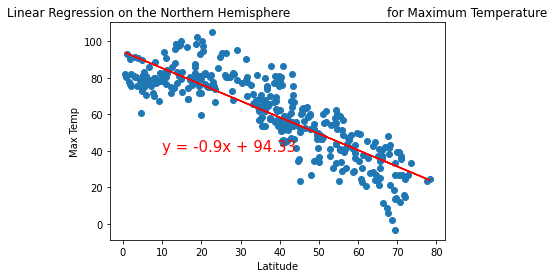

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

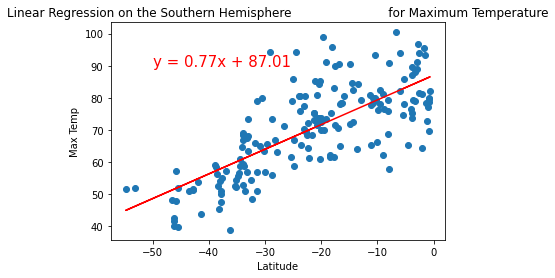

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

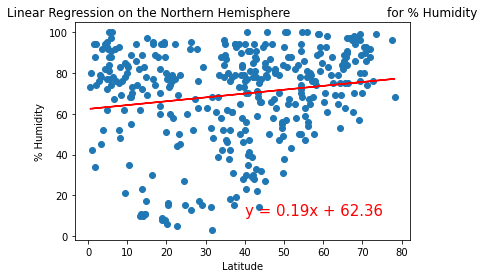

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

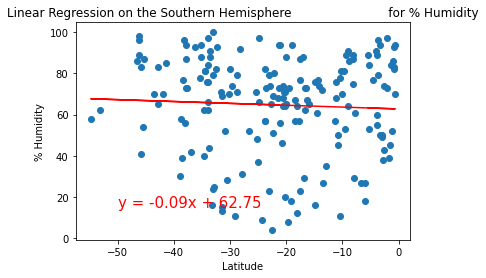

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

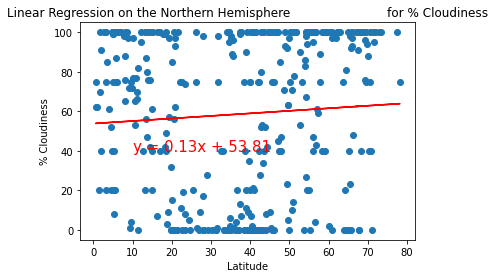

In [41]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

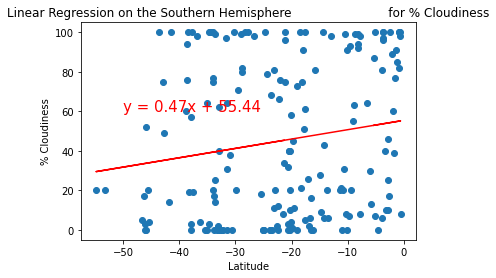

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

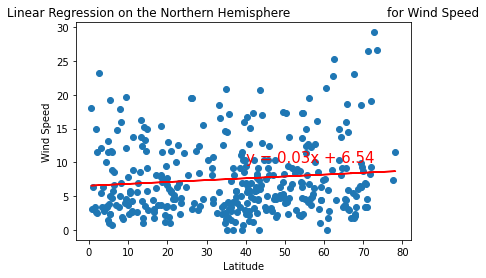

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

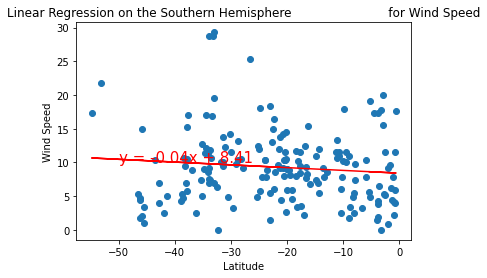

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,10))